<a href="https://colab.research.google.com/github/Natasha-70/PRODIGY_DS-/blob/main/PRODIGY_DS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/accidents.csv')

Text(0, 0.5, 'Count')

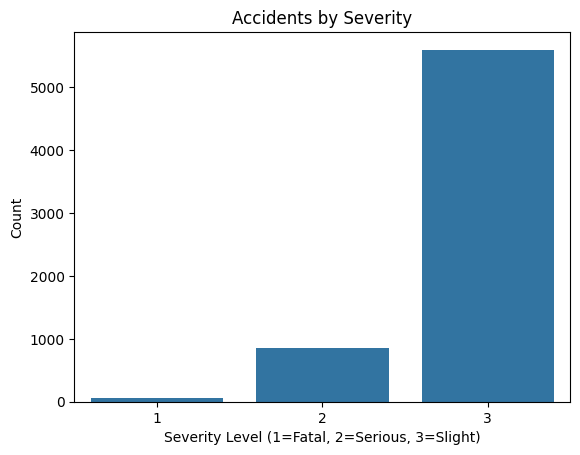

In [ ]:
# Convert 'Date' and 'Time' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

# Drop rows with missing Date or Severity
df = df.dropna(subset=['Date', 'Accident_Severity'])

# Count plot for severity
sns.countplot(data=df, x='Accident_Severity')
plt.title("Accidents by Severity")
plt.xlabel("Severity Level (1=Fatal, 2=Serious, 3=Slight)")
plt.ylabel("Count")


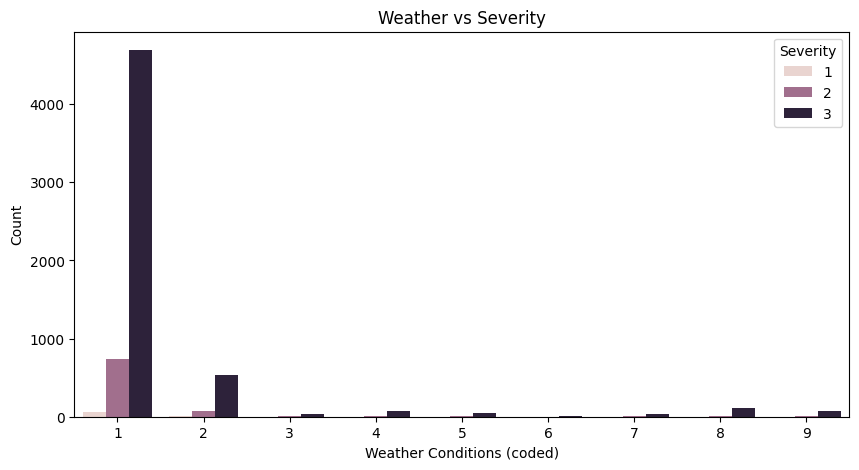

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weather_Conditions', hue='Accident_Severity')
plt.title("Weather vs Severity")
plt.xlabel("Weather Conditions (coded)")
plt.ylabel("Count")
plt.legend(title='Severity')
plt.show()

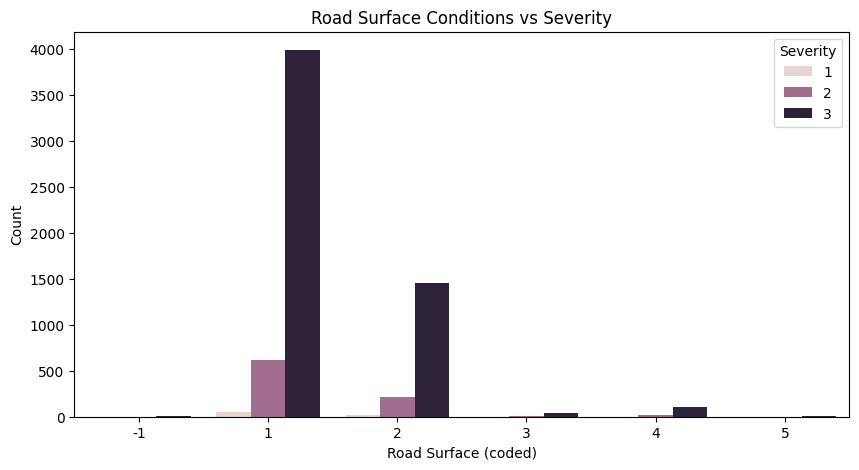

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Road_Surface_Conditions', hue='Accident_Severity')
plt.title("Road Surface Conditions vs Severity")
plt.xlabel("Road Surface (coded)")
plt.ylabel("Count")
plt.legend(title='Severity')
plt.show()

In [ ]:
# Create a base map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
display(m)

In [ ]:
# Prepare data for heatmap
df_heatmap = df.dropna(subset=['Latitude', 'Longitude'])
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_heatmap.iterrows()]

In [ ]:
# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Display the map with heatmap
display(m)